# Chapter 7: k-Nearest Neighbors (kNN)

## Import required packages

In [60]:
# may need to reinstall the dmba package

!pip install dmba

In [61]:
# Import packages
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from dmba import classificationSummary

## Load the data

In [62]:
# load the file: RidingMowers.csv, store with the name: mower_df

mower_df = pd.read_csv('RidingMowers.csv')
# preview it
mower_df.Ownership.value_counts()

Ownership
Owner       12
Nonowner    12
Name: count, dtype: int64

In [63]:
# create a new dataframe (name): newHousehold
# use: {'Income': [60], 'Lot_Size': [20]}

newHousehold = pd.DataFrame({
    'Income': [60], 
    'Lot_Size': [20]})
# show newHousehold 
newHousehold

,Income,Lot_Size
0,60,20


## Scatter plot with mower_df (full data)

In [64]:
# use df (name), for the subset: Ownership=='Owner'
# preview df

df = mower_df[mower_df.Ownership=='Owner']

df

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


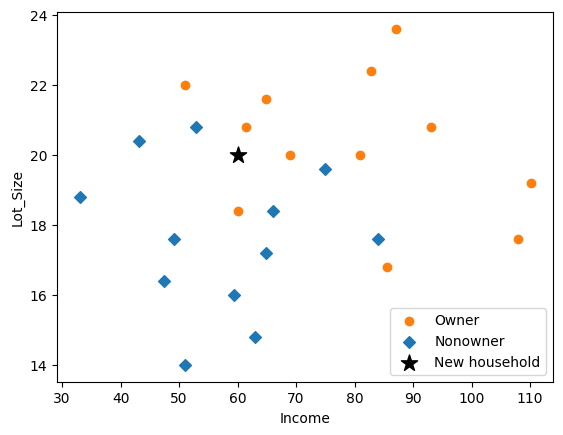

In [65]:
# plot df with plt.scatter
# Income as x, Lot_Size as y, use marker='o', label='Owner', color='C1'

plt.scatter(df.Income, df.Lot_Size, marker='o', label='Owner', color='C1')
# use df2 , for the subset: Ownership=='Nonowner'
# plot df2 with plt.scatter
# Income as x, Lot_Size as y, marker='D', label='Nonowner', color='C0'

df2 = mower_df[mower_df.Ownership=='Nonowner']

plt.scatter(df2.Income, df2.Lot_Size, marker='D', label='Nonowner', color='C0')
# plot newHousehold with plt.scatter
# newHousehold.Income as x, newHousehold.Lot_Size as y, marker='*', label='New household', color='black', s=150
# s: to set the size of the marker

plt.scatter(newHousehold.Income, newHousehold.Lot_Size, marker='*', label='New household', color='black', s=150)

# set x-axis label: Income
# set y-axis label: Lot_Size

plt.xlabel('Income')
plt.ylabel('Lot_Size')
# use plt.legend(loc=4)
# loc=4, to show the legend in the bottom right corner

plt.legend(loc=4)
# plt.show()

## Normalization and transformation

In [66]:
# define x and y

x = mower_df[['Income', 'Lot_Size']]

y = mower_df.Ownership

In [67]:
# split the data to get train_x, valid_x, train_y, valid_y
# set test_size=0.4, random_state=1

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

In [68]:
# need to standardize train_x and valid_x
# use scaler (name) for StandardScaler()

scaler = StandardScaler()
# use train_x to fit and transform scaler (not mower_df, not valid_x, to avoid data leakage)
# convert the result into a dataframe, set the index and columns
# redefine train_x

pd.DataFrame(scaler.fit_transform(train_x), index=train_x.index, columns=train_x.columns)
# use scaler to transform valid_x (no need to fit again)
# convert the result into a dataframe, set the index and columns
# redefine valid_x

valid_x = pd.DataFrame(scaler.transform(valid_x), index=valid_x.index, columns=valid_x.columns)
# use scaler to transform newHousehold (no need to fit again, no y here)
# convert the result into a dataframe, set the index and columns
# redefine newHousehold

newHousehold = pd.DataFrame(scaler.transform(newHousehold), index=newHousehold.index, columns=newHousehold.columns)

In [69]:
valid_x.head()

,Income,Lot_Size
13,-0.979034,0.992991
18,-0.676887,-1.173534
3,-0.580750,0.992991
14,-0.429676,-0.631903
20,-1.226245,-0.992991


## K-nearest neighbour (for classification)

In [70]:
# use knn for KNeighborsClassifier()
# set n_neighbors=3

knn = KNeighborsClassifier(n_neighbors=3)
# fit knn with train_x and train_y

knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [71]:
# use classificationSummary() for actual y and predicted y in validation dataset

classificationSummary(valid_y, knn.predict(valid_x))

Confusion Matrix (Accuracy 0.6000)

       Prediction
Actual 0 1
     0 6 0
     1 4 0


In [72]:
# use accuracy_score() for actual y and predicted y in validation dataset

# accuracy_score(valid)

In [73]:
len(range(1, 15))

14

In [76]:
# Train a classifier for different values of k
# define results, as an empty list

len(range(1,100))

results=[]
# use the for loop, for each k, in range(1, 15), from 1 to 14 (15 is excluded)
# define knn, for KNeighborsClassifier(n_neighbors=k), fit with train_x and train_y
# use results.append({}) to get the accuracy score for each k
# set 'k': k
# set 'accuracy': accuracy_score(), actual y, predicated y from validation

for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    results.append({'k':k,
                    'accuracy_score':accuracy_score(valid_y, knn.predict(valid_x))})
# Convert results to a pandas data frame

pd.DataFrame(results)

,k,accuracy_score
0,1,0.6
1,2,0.6
2,3,0.6
3,4,0.6
4,5,0.6
5,6,0.6
6,7,0.6
7,8,0.6
8,9,0.6
9,10,0.6


## Search the neighbours

In [86]:
# pick a k, then fit knn with train_x and train_y

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x, train_y)

# use kneighbors() on the new data: newHousehold
# distances, indices as the two returns

distances, indices = knn.kneighbors(newHousehold)
# use print() to display a few results together
# print the prediction and the values of distances and indices

print('Distances', distances)
print('Indices', indices)
print('Prediction:', knn.predict(newHousehold))
# use pd.concat to combine two dataframes,train_x and train_y, with a list []
# use axis=1, to combine by columns, define as df
# df is the training dataset

df = pd.concat([train_x, train_y], axis=1)

# use iloc[] for df, with indices[0]
# not using loc[], as we don't look at labels, but the indices (from 0, 1, 2, ...)
# use 0 here, as there is only one row in newHousehold

df.iloc[indices[0]]


Distances [[38.2408572 48.0993682 53.3513685]]
Indices [[2 6 8]]
Prediction: ['Nonowner']


,Income,Lot_Size,Ownership
21,33.0,18.8,Nonowner
15,43.2,20.4,Nonowner
22,51.0,14.0,Nonowner
